In [4]:
%load_ext autoreload
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

sys.path.append("../")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%autoreload
import experiment
import experiment.resnet2d_top20 as experiment
import src
from src.run import Run
from src.train import train
import experiment.cifar10 as experiment

ImportError: cannot import name 'a'

In [11]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


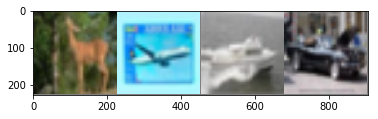

 deer plane  ship   car


In [12]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
run = Run("../experiment/cifar10/test1217_lowlr")
model = experiment.model
model.fc = nn.Linear(2048, 10)
cuda = torch.device("cuda:1")
model.to(device=cuda)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [ ]:
os.remove(run.log_file)
train(
    train_loader=trainloader,
    val_dataloader=testloader,
    model=model,
    loss_func=nn.CrossEntropyLoss(),
    log_file=run.log_file,
    save_steps=10,
    val_steps=200,
    init_lr=0.01,
    save_model_dir=run.weights_dir,
device=cuda)

Step 0/64000.0
----------
computing validation loss...
validation error step:    1 loss: 2.3396
step:   10 loss: 3.9442
../experiment/cifar10/test1217_lowlr/weights/000010.pt
step:   20 loss: 3.9794
../experiment/cifar10/test1217_lowlr/weights/000020.pt
step:   30 loss: 3.6893
../experiment/cifar10/test1217_lowlr/weights/000030.pt
step:   40 loss: 2.9094
../experiment/cifar10/test1217_lowlr/weights/000040.pt
step:   50 loss: 2.5070
../experiment/cifar10/test1217_lowlr/weights/000050.pt
step:   60 loss: 2.5231
../experiment/cifar10/test1217_lowlr/weights/000060.pt
step:   70 loss: 2.6361
../experiment/cifar10/test1217_lowlr/weights/000070.pt
step:   80 loss: 2.5669
../experiment/cifar10/test1217_lowlr/weights/000080.pt
step:   90 loss: 2.4572
../experiment/cifar10/test1217_lowlr/weights/000090.pt
step:  100 loss: 2.4378
../experiment/cifar10/test1217_lowlr/weights/000100.pt
step:  110 loss: 2.3576
../experiment/cifar10/test1217_lowlr/weights/000110.pt
step:  120 loss: 2.4620
../experime

step: 1000 loss: 2.0478
../experiment/cifar10/test1217_lowlr/weights/001000.pt
computing validation loss...
validation error step: 1001 loss: 1.9660
step: 1010 loss: 2.0094
../experiment/cifar10/test1217_lowlr/weights/001010.pt
step: 1020 loss: 2.0923
../experiment/cifar10/test1217_lowlr/weights/001020.pt
step: 1030 loss: 2.0496
../experiment/cifar10/test1217_lowlr/weights/001030.pt
step: 1040 loss: 2.0828
../experiment/cifar10/test1217_lowlr/weights/001040.pt
step: 1050 loss: 2.0082
../experiment/cifar10/test1217_lowlr/weights/001050.pt
step: 1060 loss: 2.0541
../experiment/cifar10/test1217_lowlr/weights/001060.pt
step: 1070 loss: 2.0057
../experiment/cifar10/test1217_lowlr/weights/001070.pt
step: 1080 loss: 2.0357
../experiment/cifar10/test1217_lowlr/weights/001080.pt
step: 1090 loss: 2.0345
../experiment/cifar10/test1217_lowlr/weights/001090.pt
step: 1100 loss: 2.1445
../experiment/cifar10/test1217_lowlr/weights/001100.pt
step: 1110 loss: 1.9962
../experiment/cifar10/test1217_lowlr/